In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [44]:
from google.colab import files
uploaded = files.upload()
im_gray = cv2.imread("med_image1.png", 0)
im_gray_copy = im_gray.copy()

Saving med_image1.png to med_image1 (3).png


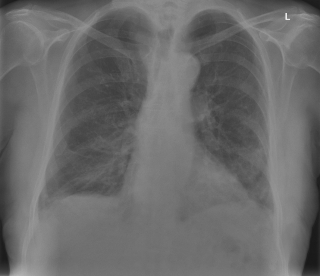

In [45]:
cv2_imshow(im_gray) #
cv2.waitKey(0)
cv2.destroyAllWindows()

height, width 276 320
Images with grayscale offsets: original, image-hole, image-thershold, image-negative, negative-offest, positive-offset


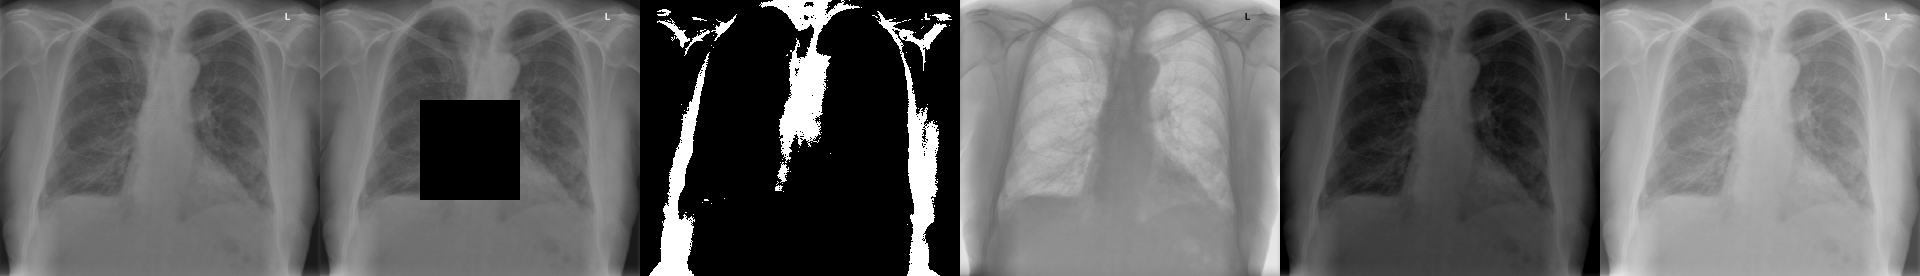

In [46]:
#1. Image Manipulation
himg1, wimg1 = im_gray.shape
print('height, width', himg1, wimg1)
print('Images with grayscale offsets: original, image-hole, image-thershold, image-negative, negative-offest, positive-offset')
im_gray = np.float32(im_gray)/1.0 
im_gray_negoff = im_gray - 50 
im_gray_posoff = im_gray + 50 
im_gray_new = im_gray.copy()
im_gray_new[100:200, 100:200] = 0
ret, im_thresh = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
res = np.hstack((im_gray, im_gray_new, im_thresh, (im_gray-255)*(-1), im_gray_negoff, im_gray_posoff))
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()

Xray image, equalized image


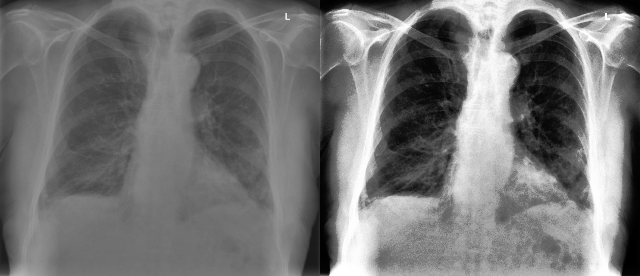

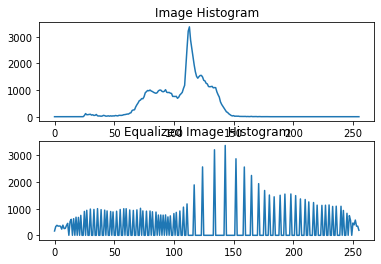

In [47]:
#2. Histogram Equalization
# of a image using cv2.equalizeHist()

#im_gray = cv2.imread("/content/drive/MyDrive/Ndata/med_image1.png", 0)
im_gray = im_gray_copy
equ = cv2.equalizeHist(im_gray)

# find frequency of pixels in range 0-255
histr_im_gray = cv2.calcHist([im_gray],[0],None,[256],[0,256])
histr_equ = cv2.calcHist([equ],[0],None,[256],[0,256])

# stacking images side-by-side
res = np.hstack((im_gray, equ))
print('Xray image, equalized image')
# show image input vs output
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.subplot(2,1,1)
plt.plot(histr_im_gray)
plt.title('Image Histogram')
plt.subplot(2,1,2), plt.plot(histr_equ)
plt.title('Equalized Image Histogram')
plt.show()

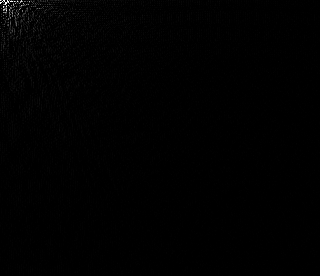

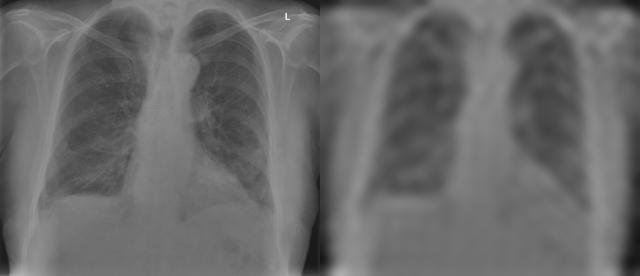

In [48]:
#3. DCT
#im_gray = im_gray_copy
imf = np.float32(im_gray)/1.0  # float conversion/scale
im_gray = np.float32(im_gray)/1.0 
dst = cv2.dct(imf)           # the dct
cv2_imshow(dst) #
cv2.waitKey(0)
recon_dct = np.zeros([himg1, wimg1], dtype='float')
recon_dct[0:himg1//10, 0:wimg1//10] = dst[0:himg1//10, 0:wimg1//10]
dst1 = cv2.idct(recon_dct) # the idct
res = np.hstack((im_gray, dst1))
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
from google.colab import files
uploaded = files.upload()
im_gray = cv2.imread("Echo-1(1).jpg")

Saving Echo-1(1).jpg to Echo-1(1) (2).jpg


Echo-1(1) height, width, channel_length 213 280 3


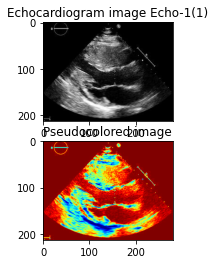

In [51]:
#4. Pseudocoloring
#im_gray = cv2.imread("/content/drive/MyDrive/Ndata/Echo-1(1).jpg")
himg1, wimg1, channel_length = im_gray.shape
print('Echo-1(1) height, width, channel_length', himg1, wimg1, channel_length)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)
plt.subplot(2,1,1)
plt.imshow(im_gray) #
plt.title("Echocardiogram image Echo-1(1)")
plt.subplot(2,1,2)
plt.imshow(im_color) #
plt.title("Pseudocolored image")
plt.show()

In [32]:
from google.colab import files
uploaded = files.upload()
med_image = cv2.imread("med_image.bmp")

Saving med_image.bmp to med_image.bmp


med_image.bmp height, width, channel_length 512 512 3


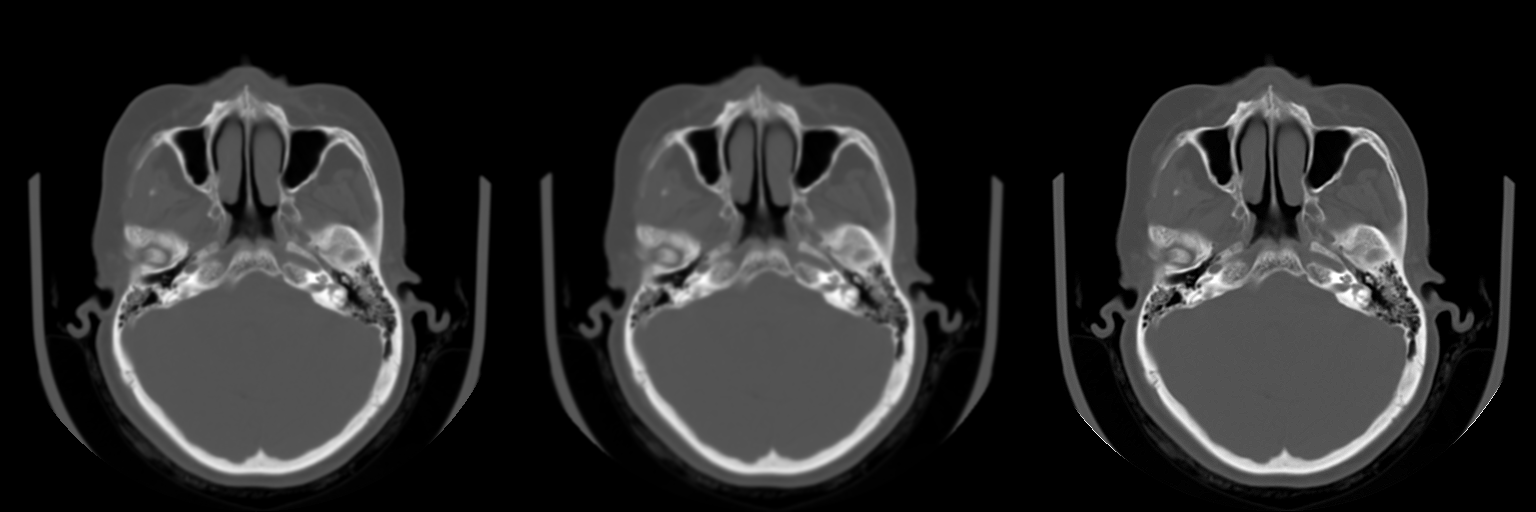

In [52]:
#5. Image filtering
#med_image = cv2.imread('/content/drive/MyDrive/Ndata/med_image.bmp')
#med_image = cv2.imread('med_image.bmp')
himg1, wimg1, channel_length = med_image.shape
print('med_image.bmp height, width, channel_length', himg1, wimg1, channel_length)
med_img = cv2.cvtColor(med_image, cv2.COLOR_BGR2GRAY)

gausBlur = cv2.GaussianBlur(med_img, (5,5),0) 
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(med_img, ddepth=-1, kernel=kernel)

res = np.hstack((med_img, gausBlur, image_sharp))
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
from google.colab import files
uploaded = files.upload()

Saving foetal_ecg.dat to foetal_ecg.dat


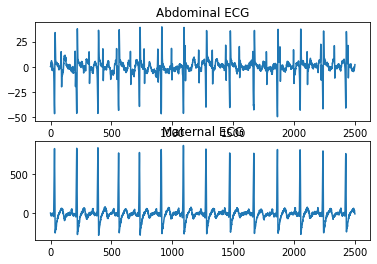

In [53]:
# 6. Adaptive filtering
X = []
Y = []
with open('foetal_ecg.dat', 'r') as datafile:
	plotting = csv.reader(datafile, delimiter='\t')
	for ROWS in plotting:
		X.append(float(ROWS[1]))
		Y.append(float(ROWS[7]))
  
plt.subplot(2,1,1)
plt.plot(X)
plt.title('Abdominal ECG')
plt.subplot(2,1,2)
plt.plot(Y)
plt.title('Maternal ECG')
plt.show()

length 2500


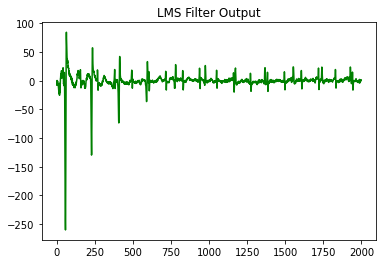

In [54]:
mu=0.0000001
length=len(Y)
print('length',length)
filter = np.zeros([length+1, 1], dtype='float')
filter[1]=4
error = np.zeros([length+1, 1], dtype='float')

for i in range(1, length):
      error[i]=np.array(X[i])-filter[i]*np.array(Y[i])
      filter[i+1]=filter[i]+2*mu*error[i]*np.array(Y[i])

#plt.plot(X, 'r')
#plt.plot(filter, 'b')
plt.plot(error[501:length], 'g')
plt.title('LMS Filter Output')
plt.show()

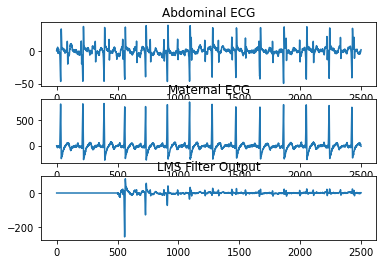

In [55]:
plt.subplot(3,1,1)
plt.plot(X)
plt.title('Abdominal ECG')
plt.subplot(3,1,2)
plt.plot(Y)
plt.title('Maternal ECG')
plt.subplot(3,1,3)
signal = np.zeros((length, 1), dtype = "float")
signal[501:length] = error[501:length]
plt.plot(signal)
plt.title('LMS Filter Output')
plt.show()

In [40]:
from google.colab import files
uploaded = files.upload()

Saving maxresdefault.jpg to maxresdefault.jpg


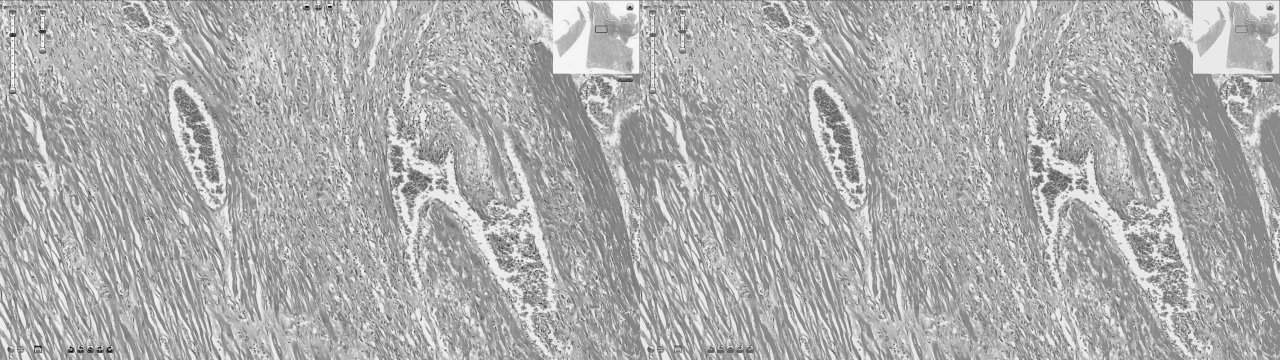

In [56]:
#7 Segmentation
im_gray = cv2.imread('maxresdefault.jpg')

twoDimage =  im_gray.reshape((-1,3))
twoDimage = np.float32(twoDimage)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
attempts=10

ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((im_gray.shape))

im_gray1 = cv2.resize(im_gray, (640, 360), interpolation = cv2.INTER_LINEAR)
result_image1 = cv2.resize(result_image, (640, 360), interpolation = cv2.INTER_LINEAR)
result_image1 = cv2.cvtColor(result_image1, cv2.COLOR_BGR2GRAY)
im_gray1 = cv2.cvtColor(im_gray1, cv2.COLOR_BGR2GRAY)
res1 = np.hstack((im_gray1, result_image1))
cv2_imshow(res1)
cv2.waitKey(0)
cv2.destroyAllWindows()